In [35]:
import requests
import time
import json
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os

from datetime import datetime
from tqdm import tqdm

In [36]:
from utils import *

In [3]:
raw_data = get_all_products()

In [4]:
histories = []
for row in tqdm(raw_data['data']['rows']):
    histories.append((row, get_history(row['id'])))
    time.sleep(0.2)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  3.79it/s]


In [31]:
def plot_data(data, title=None, shortName=None):
        
    df = pd.DataFrame(data=data, columns=['date', 'price'])

    df['MA12'] = df['price'].rolling(12).mean()
    df['MA36'] = df['price'].rolling(36).mean()

    df.plot(x='date', figsize=(12, 5))
    plt.xlabel('date')
    plt.ylabel('price')
    plt.axis()
    plt.legend()
    plt.title(f"{title} | {shortName}")
    
    if shortName:
        os.makedirs("reports", exist_ok=True)
        plt.savefig(os.path.join("reports", f'{shortName}.png'))
        
    plt.show()

In [32]:
len(histories)

21

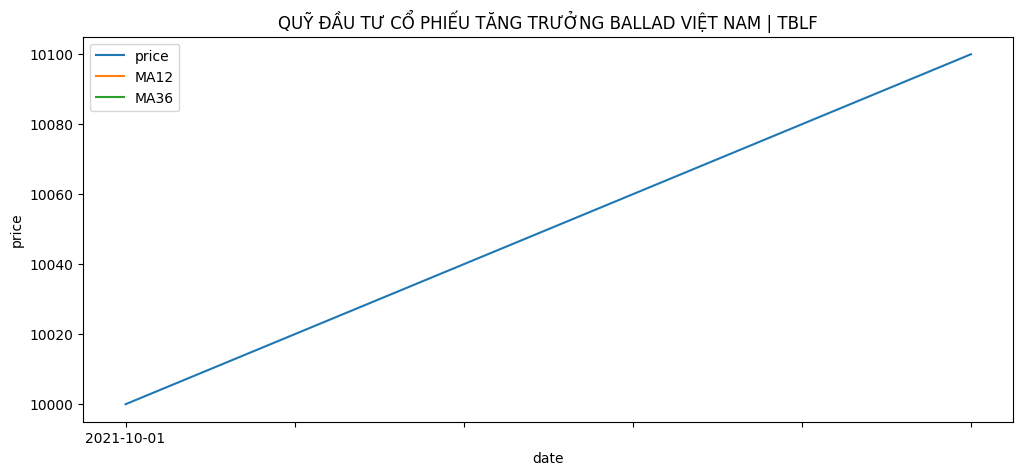

In [33]:
for info, prices in histories:
    title = info['name']
    shortName = info['shortName']
    data = [(d['navDate'], float(d['nav'])) for d in prices['data']]    
    plot_data(data, title, shortName)

In [10]:
import os

In [11]:
os.makedirs("data", exist_ok=True)

In [12]:
with open(os.path.join("data", "raw_data.json"), "w") as fp:
    json.dump(raw_data, fp)

In [13]:
for info, prices in histories:
    code = info['shortName']
    with open(os.path.join("data", f"{code}.json"), "w") as fp:
        json.dump(prices, fp)

# Update README.md

In [56]:
with open("README.md", 'r') as f:
    lines = f.readlines()

with open("README.md", 'w') as f:
    for line in lines:
        line = line.strip()
        if line == "# Reports":
            f.write(line + "\n")
            for info, prices in histories:
                shortName = info['shortName']
                fname = f'{shortName}.png'
                line = f"![{shortName}](./reports/{fname})"
                f.write(line + "\n")
            break
        f.write(line+ "\n")        